In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import regressor as reg

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def touching_sides(mask):
    return sum(
        int(any(side))
        for side in [mask[0,:], mask[-1,:], mask[:,0], mask[:, -1]]
        )

In [4]:
def crop(img, crp):
    cx, cy = reg.center_of(img)
    return img[cy-crp:cy+crp, cx-crp:cx+crp]

In [5]:
def findcrop(mask):
    rad = min(mask.shape) // 2
    cropped_mask = crop(mask, rad)
    sides = touching_sides(cropped_mask)
    while sides == 1:
        rad -= 1
        cropped_mask = crop(mask, rad)
        sides = touching_sides(cropped_mask)
        # print(f'sides:{sides}, rad:{rad}')
    return rad

In [10]:
imgs = reg.load_data('data/')

In [8]:
gray = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

error: /io/opencv/modules/imgproc/src/color.cpp:11111: error: (-215) scn == 3 || scn == 4 in function cvtColor


TypeError: Image data cannot be converted to float

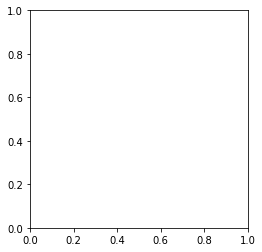

In [9]:
_, mask = cv2.threshold(imgs[0], 50,100, cv2.THRESH_BINARY)
# mask = cv2.Canny(imgs[0], 40, 50)
plt.imshow(mask)

In [169]:
touchcrop = findcrop(mask)
touchcrop

742

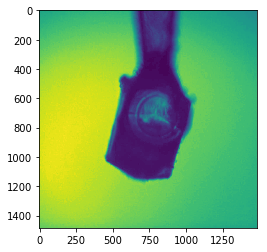

In [158]:
plt.imshow(crop(gray,touchcrop))

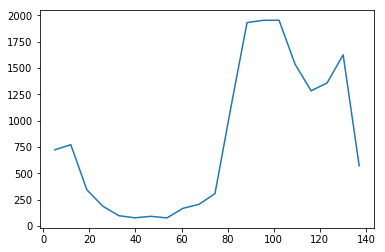

In [7]:
hist, binedges = np.histogram(small.reshape(-1), bins=20)
binedges
slanted_hist = hist-np.array(range(len(hist)))*100
plt.plot(binedges[:-1], hist)